In [24]:
import import_ipynb
from hall_data import doping, anneal, capping, params
from hall_data import filter_true
import pandas as pd
from PMP_importlib import measurement as ms

In [5]:
datafolder = "../data/SE_anneal/"

In [6]:
@filter_true
def measurement_valid(x):
    if x.capping == 'cap':
        return True
    if x.anneal <= '500C' or x.anneal == 'asdep':
        return True
    return False

In [21]:
def add_filename(x):
    filename = '_'.join([x.doping, x.capping, x.anneal]) + '.SEsnap'
    return x.append(pd.Series({'filename' : filename}))

In [25]:
def get_data(x):
    filepath = datafolder + x.filename
    data = ms.SEMeasurement(filepath).asDict()
    return x.append(pd.Series(data))

In [28]:
df = params.pipe(measurement_valid)\
    .apply(add_filename, axis = 1)\
    .apply(get_data, axis = 1)
df.columns

Index(['A2', 'Amp1', 'Angle Offset', 'B2', 'Br1', 'Eg1', 'Einf', 'Eo1',
       'Roughness', 'Thickness # 1', 'Thickness # 2', 'Thickness # 3',
       'Thickness # 4', 'anneal', 'capping', 'doping', 'filename'],
      dtype='object')

<AxesSubplot:xlabel='doping', ylabel='Eg1'>

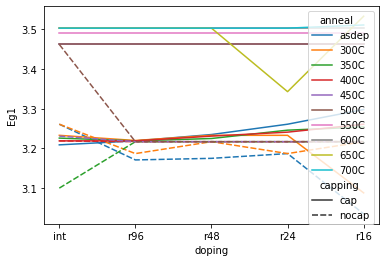

In [39]:
if __name__ == '__main__':
    import seaborn as sns
    sns.lineplot(x = 'doping', y = 'Eg1',
                style = 'capping', hue = 'anneal',
                data = df)